# Introduction to Financial Engineering - Project Assignment

     Ayush Abrol B20AI052
     Aryan Tiwari B20AI056
     Neehal Prakash Bajaj B20AI026
---

### Picking any 10 risky assets from the market. Using their 3 months closing price to obtain simple returns.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import quandl
import scipy.optimize as sco

plt.style.use('fivethirtyeight')
np.random.seed(777)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import yfinance as yf
from datetime import datetime

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = yf.download(tickers = 'AAPL MSFT AMZN GOOG TSLA NVDA INTC CSCO PYPL V',
                     start = datetime(2022, 11, 26),
                        end = datetime(2023, 2, 26),
                        progress = False)

In [5]:
data

Adj Close                                               \
                  AAPL       AMZN       CSCO        GOOG       INTC   
Date                                                                  
2022-11-25  147.884201  93.410004  48.016354   97.599998  28.986799   
2022-11-28  144.000137  93.949997  47.698891   96.250000  28.384142   
2022-11-29  140.954788  92.419998  47.897305   95.440002  28.552095   
2022-11-30  147.804321  96.540001  49.325890  101.449997  29.708010   
2022-12-01  148.083893  95.500000  49.573910  101.279999  29.470900   
...                ...        ...        ...         ...        ...   
2023-02-17  152.550003  97.199997  50.770000   94.589996  27.610001   
2023-02-21  148.479996  94.580002  49.689999   92.050003  26.059999   
2023-02-22  148.910004  95.790001  49.310001   91.800003  25.469999   
2023-02-23  149.399994  95.820000  49.209999   91.070000  25.610001   
2023-02-24  146.710007  93.500000  48.480000   89.349998  25.139999   

                                                                       ...  \
                  MSFT        NVDA       PYPL        TSLA           V  ...   
Date                                                                   ...   
2022-11-25  246.871658  162.658386  80.080002  182.860001  213.372070  ...   
2022-11-28  241.155975  158.229523  79.930000  182.919998  210.847031  ...   
2022-11-29  239.729553  156.350006  77.639999  180.830002  208.651321  ...   
2022-11-30  254.502548  169.229996  78.410004  194.699997  216.575806  ...   
2022-12-01  254.053665  171.350006  78.529999  194.699997  216.575806  ...   
...                ...         ...        ...         ...         ...  ...   
2023-02-17  258.059998  213.880005  74.660004  208.309998  223.559998  ...   
2023-02-21  252.669998  206.550003  75.239998  197.369995  220.619995  ...   
2023-02-22  251.509995  207.539993  75.480003  200.860001  220.020004  ...   
2023-02-23  254.770004  236.639999  75.190002  202.070007  221.130005  ...   
2023-02-24  249.220001  232.860001  73.550003  196.880005  219.550003  ...   

               Volume                                                     \
                 AAPL       AMZN      CSCO      GOOG      INTC      MSFT   
Date                                                                       
2022-11-25   35195900   35088600   8492600   8567800  11314900   9200800   
2022-11-28   69246000   74943100  14976600  19974500  28267900  24778200   
2022-11-29   83763800   65567300  13779300  20220000  24361500  17956300   
2022-11-30  111380900  102805800  29919700  39888100  72072500  47594200   
2022-12-01   71250400   68488000  18559500  21771500  38896300  26041500   
...               ...        ...       ...       ...       ...       ...   
2023-02-17   59095900   59967700  25314900  31074100  32054700  29979600   
2023-02-21   58867200   56580400  25100500  28367200  63668400  28397400   
2023-02-22   51011300   59534100  20301900  29891100  89195300  22491100   
2023-02-23   48394200   48467000  14066200  32423700  56473200  29219100   
2023-02-24   55469600   57053800  17251600  31295600  44089900  24990900   

                                                      
                 NVDA      PYPL       TSLA         V  
Date                                                  
2022-11-25   16793400   4634500   50672700   1993500  
2022-11-28   30374100  11282600   92905200  10229400  
2022-11-29   29838400  15491100   83357100   8986900  
2022-11-30   56529800  25747300  109186400  13918100  
2022-12-01   47097700  15189000   80046200  11261500  
...               ...       ...        ...       ...  
2023-02-17   46495700  15830800  213080200   4520200  
2023-02-21   41001500  14537400  180018600   7276100  
2023-02-22   51318400   9526700  191828500   4621800  
2023-02-23  111799500   9292000  146360000   5533800  
2023-02-24   58971600  12317700  142228100   4414400  

[62 rows x 60 columns]

In [6]:
# Creating a new dataframe with the adjusted close price for each stock.
data_close = data['Adj Close']
data_close

,AAPL,AMZN,CSCO,GOOG,INTC,MSFT,NVDA,PYPL,TSLA,V
Date,,,,,,,,,,
2022-11-25,147.884201,93.410004,48.016354,97.599998,28.986799,246.871658,162.658386,80.080002,182.860001,213.372070
2022-11-28,144.000137,93.949997,47.698891,96.250000,28.384142,241.155975,158.229523,79.930000,182.919998,210.847031
2022-11-29,140.954788,92.419998,47.897305,95.440002,28.552095,239.729553,156.350006,77.639999,180.830002,208.651321
2022-11-30,147.804321,96.540001,49.325890,101.449997,29.708010,254.502548,169.229996,78.410004,194.699997,216.575806
2022-12-01,148.083893,95.500000,49.573910,101.279999,29.470900,254.053665,171.350006,78.529999,194.699997,216.575806
...,...,...,...,...,...,...,...,...,...,...
2023-02-17,152.550003,97.199997,50.770000,94.589996,27.610001,258.059998,213.880005,74.660004,208.309998,223.559998
2023-02-21,148.479996,94.580002,49.689999,92.050003,26.059999,252.669998,206.550003,75.239998,197.369995,220.619995
2023-02-22,148.910004,95.790001,49.310001,91.800003,25.469999,251.509995,207.539993,75.480003,200.860001,220.020004


### Using the mean-variance theory and build the Markowitz efficient frontier.

In [7]:
# Use the pct_change() method to calculate the daily returns for each stock.
returns = data_close.pct_change()
returns

,AAPL,AMZN,CSCO,GOOG,INTC,MSFT,NVDA,PYPL,TSLA,V
Date,,,,,,,,,,
2022-11-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-28,-0.026264,0.005781,-0.006612,-0.013832,-0.020791,-0.023152,-0.027228,-0.001873,0.000328,-0.011834
2022-11-29,-0.021148,-0.016285,0.004160,-0.008416,0.005917,-0.005915,-0.011878,-0.028650,-0.011426,-0.010414
2022-11-30,0.048594,0.044579,0.029826,0.062971,0.040484,0.061624,0.082379,0.009918,0.076702,0.037980
2022-12-01,0.001891,-0.010773,0.005028,-0.001676,-0.007981,-0.001764,0.012527,0.001530,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
2023-02-17,-0.007547,-0.009679,-0.004315,-0.012424,-0.020922,-0.015602,-0.027907,-0.026978,0.031033,-0.010052
2023-02-21,-0.026680,-0.026955,-0.021272,-0.026853,-0.056139,-0.020887,-0.034272,0.007768,-0.052518,-0.013151
2023-02-22,0.002896,0.012793,-0.007647,-0.002716,-0.022640,-0.004591,0.004793,0.003190,0.017683,-0.002720


In [8]:
# Calculate the mean, variance and correlation factor for each stock.
mean_returns = returns.mean()
var_daily_returns = returns.var()
cov_matrix = returns.cov()
std_dev_daily_returns = returns.std()
correlation_matrix = returns.corr()

In [9]:
mean_returns

AAPL    0.000044
AMZN    0.000355
CSCO    0.000249
GOOG   -0.001128
INTC   -0.002080
MSFT    0.000368
NVDA    0.006667
PYPL   -0.001162
TSLA    0.002425
V       0.000541
dtype: float64

In [10]:
var_daily_returns

AAPL    0.000356
AMZN    0.000690
CSCO    0.000188
GOOG    0.000650
INTC    0.000508
MSFT    0.000436
NVDA    0.001594
PYPL    0.000472
TSLA    0.002451
V       0.000149
dtype: float64

In [11]:
std_dev_daily_returns

AAPL    0.018860
AMZN    0.026271
CSCO    0.013708
GOOG    0.025505
INTC    0.022540
MSFT    0.020880
NVDA    0.039921
PYPL    0.021729
TSLA    0.049503
V       0.012219
dtype: float64

In [12]:
cov_matrix

,AAPL,AMZN,CSCO,GOOG,INTC,MSFT,NVDA,PYPL,TSLA,V
AAPL,0.000356,0.000285,0.000150,0.000330,0.000284,0.000278,0.000478,0.000186,0.000472,0.000161
AMZN,0.000285,0.000690,0.000188,0.000506,0.000308,0.000414,0.000587,0.000324,0.000447,0.000166
CSCO,0.000150,0.000188,0.000188,0.000187,0.000177,0.000144,0.000190,0.000123,0.000059,0.000080
GOOG,0.000330,0.000506,0.000187,0.000650,0.000346,0.000400,0.000501,0.000328,0.000416,0.000153
INTC,0.000284,0.000308,0.000177,0.000346,0.000508,0.000282,0.000497,0.000258,0.000276,0.000137
MSFT,0.000278,0.000414,0.000144,0.000400,0.000282,0.000436,0.000565,0.000200,0.000387,0.000142
NVDA,0.000478,0.000587,0.000190,0.000501,0.000497,0.000565,0.001594,0.000319,0.001184,0.000279
PYPL,0.000186,0.000324,0.000123,0.000328,0.000258,0.000200,0.000319,0.000472,0.000193,0.000109
TSLA,0.000472,0.000447,0.000059,0.000416,0.000276,0.000387,0.001184,0.000193,0.002451,0.000232
V,0.000161,0.000166,0.000080,0.000153,0.000137,0.000142,0.000279,0.000109,0.000232,0.000149


In [13]:
correlation_matrix

,AAPL,AMZN,CSCO,GOOG,INTC,MSFT,NVDA,PYPL,TSLA,V
AAPL,1.000000,0.575558,0.578561,0.685792,0.669057,0.705717,0.635504,0.452875,0.505362,0.697866
AMZN,0.575558,1.000000,0.521468,0.755179,0.520455,0.753878,0.559520,0.568366,0.343353,0.517354
CSCO,0.578561,0.521468,1.000000,0.533796,0.572330,0.502670,0.347826,0.412527,0.087577,0.478331
GOOG,0.685792,0.755179,0.533796,1.000000,0.602521,0.750506,0.492407,0.592106,0.329252,0.490489
INTC,0.669057,0.520455,0.572330,0.602521,1.000000,0.599948,0.551980,0.526764,0.247471,0.497707
MSFT,0.705717,0.753878,0.502670,0.750506,0.599948,1.000000,0.677899,0.439980,0.373962,0.554764
NVDA,0.635504,0.559520,0.347826,0.492407,0.551980,0.677899,1.000000,0.367713,0.599248,0.571749
PYPL,0.452875,0.568366,0.412527,0.592106,0.526764,0.439980,0.367713,1.000000,0.179646,0.409142
TSLA,0.505362,0.343353,0.087577,0.329252,0.247471,0.373962,0.599248,0.179646,1.000000,0.383441
V,0.697866,0.517354,0.478331,0.490489,0.497707,0.554764,0.571749,0.409142,0.383441,1.000000


In [14]:
def portfolio_annualised_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns*weights ) *90
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(90)
    return std, returns

In [15]:
def random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate):
    results = np.zeros((3,num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        weights = np.random.random(10)
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_std_dev, portfolio_return = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return results, weights_record

In [16]:
num_portfolios = [1000, 5000, 10000, 25000, 50000]
risk_free_rate = 0.0178

In [17]:
def display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, weights = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe_idx = np.argmax(results[2])
    sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=returns.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    
    min_vol_idx = np.argmin(results[0])
    sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=returns.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    print ("-"*80)
    print ("Maximum Sharpe Ratio Portfolio Allocation\n")
    print ("Annualised Return:", round(rp,2))
    print ("Annualised Volatility:", round(sdp,2))
    print ("\n")
    print (max_sharpe_allocation)
    print ("-"*80)
    print ("Minimum Volatility Portfolio Allocation\n")
    print ("Annualised Return:", round(rp_min,2))
    print ("Annualised Volatility:", round(sdp_min,2))
    print ("\n")
    print (min_vol_allocation)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')
    plt.title('Simulated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('annualised volatility')
    plt.ylabel('annualised returns')
    plt.legend(labelspacing=0.8)

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.21
Annualised Volatility: 0.23


            AAPL   AMZN  CSCO  GOOG  INTC  MSFT   NVDA  PYPL   TSLA      V
allocation  1.55  14.03  2.94  6.85   1.0  4.63  26.49  2.01  20.27  20.22
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: -0.01
Annualised Volatility: 0.14


             AAPL  AMZN   CSCO  GOOG   INTC   MSFT  NVDA   PYPL  TSLA      V
allocation  15.81  0.75  13.32  0.61  15.87  11.23   2.0  15.81   3.3  21.31
--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.19
Annualised Volatility: 0.2


            AAPL  AMZN  CSCO  GOOG  INTC  MSFT   NVDA  PYPL  TSLA      V
allocation  20.1  6.88  4.36   1.1  5.15  0.21  28.99   1.8  4.29  27.11
------------------

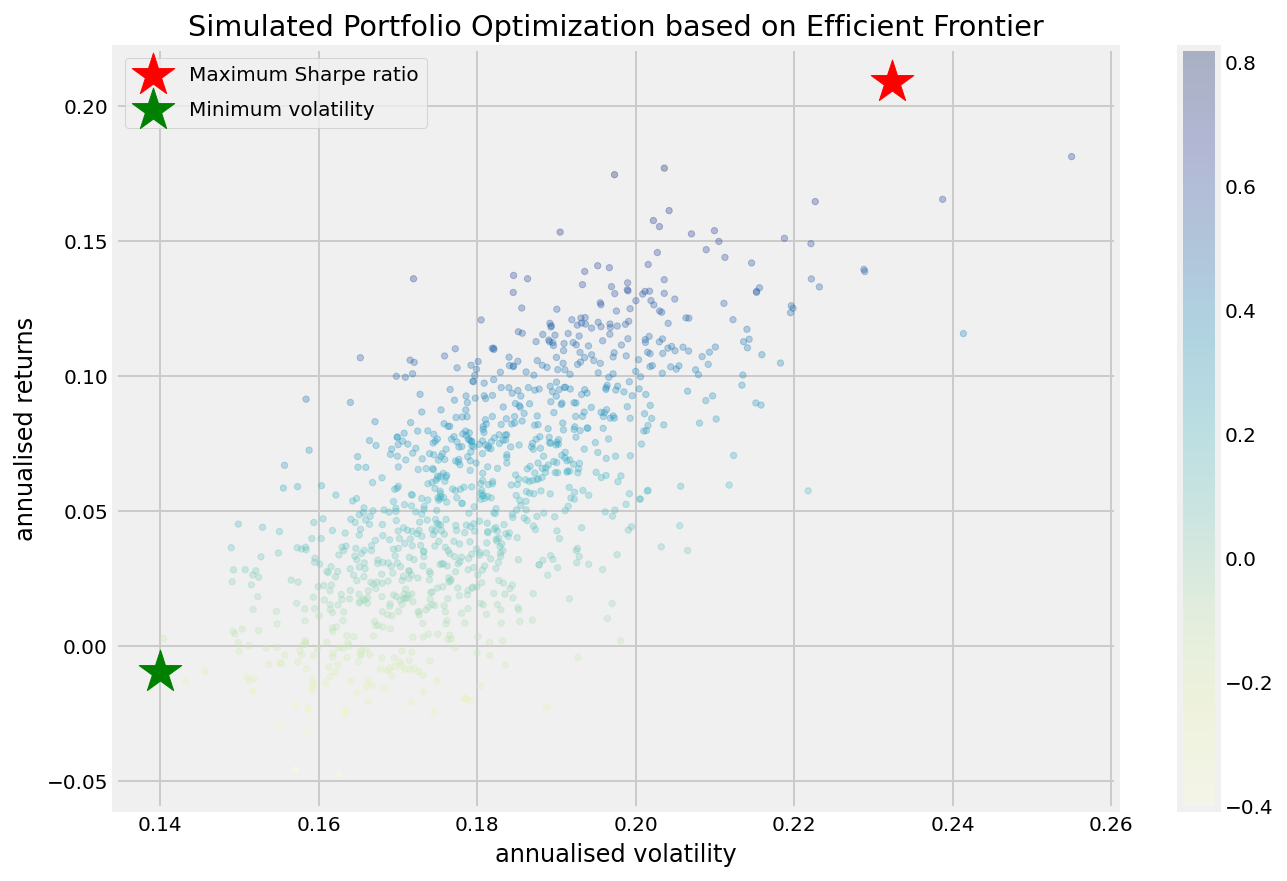

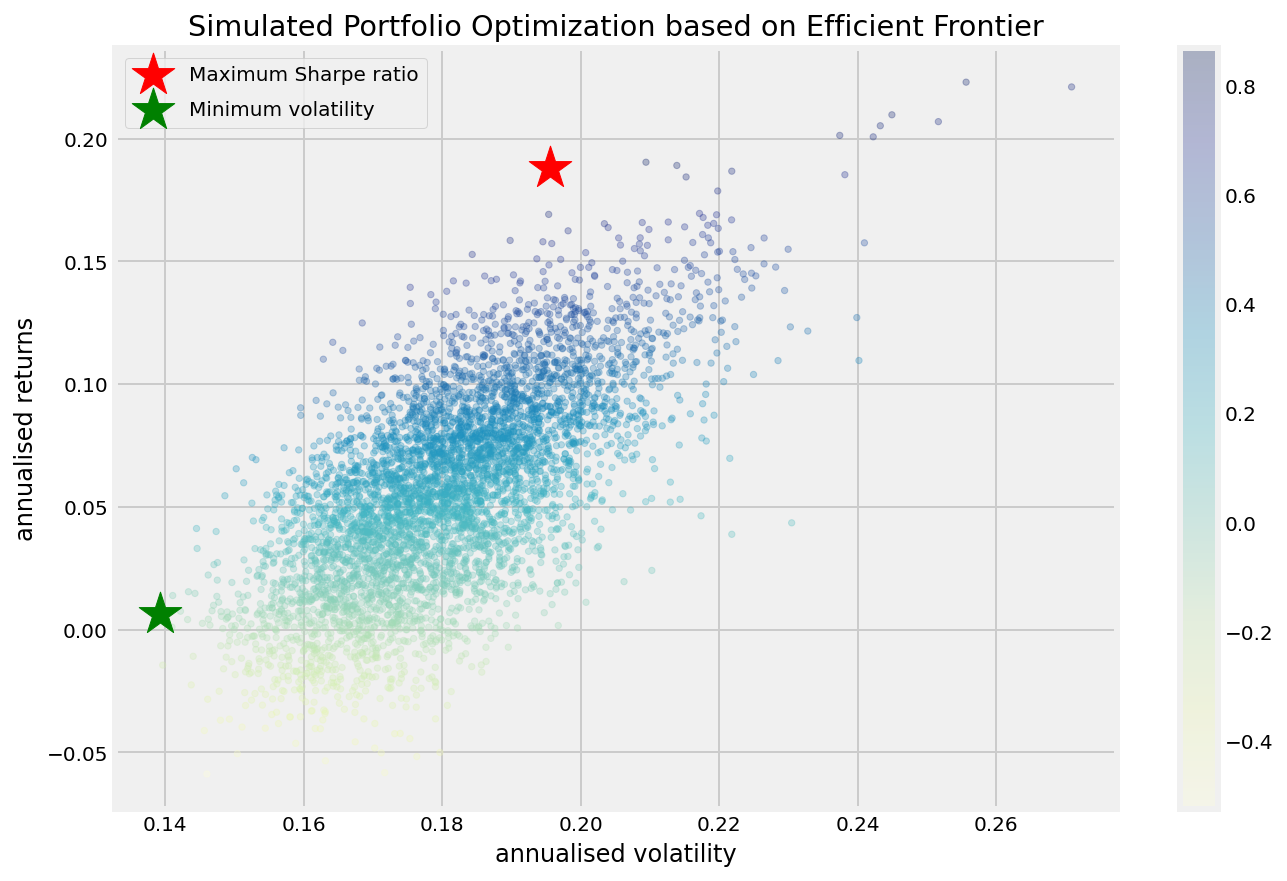

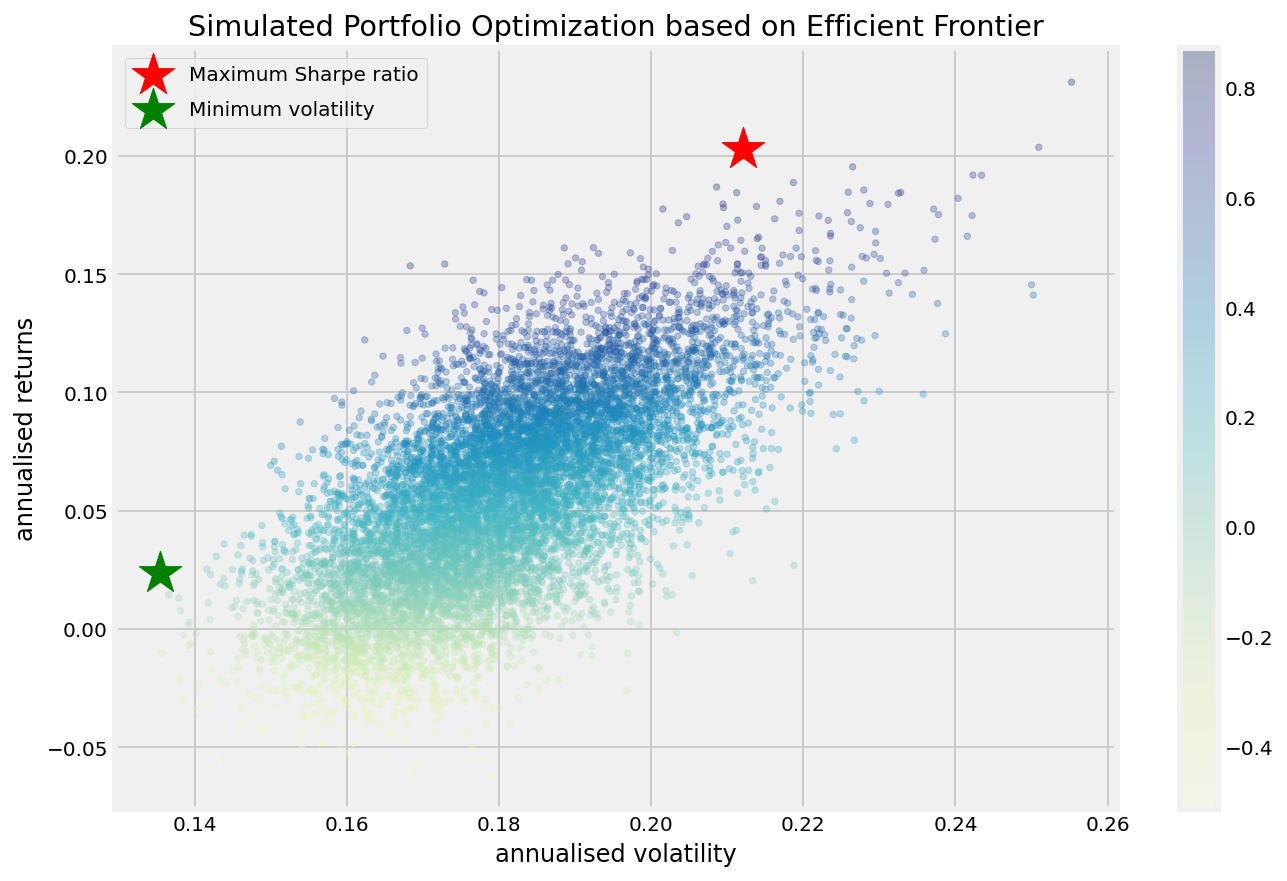

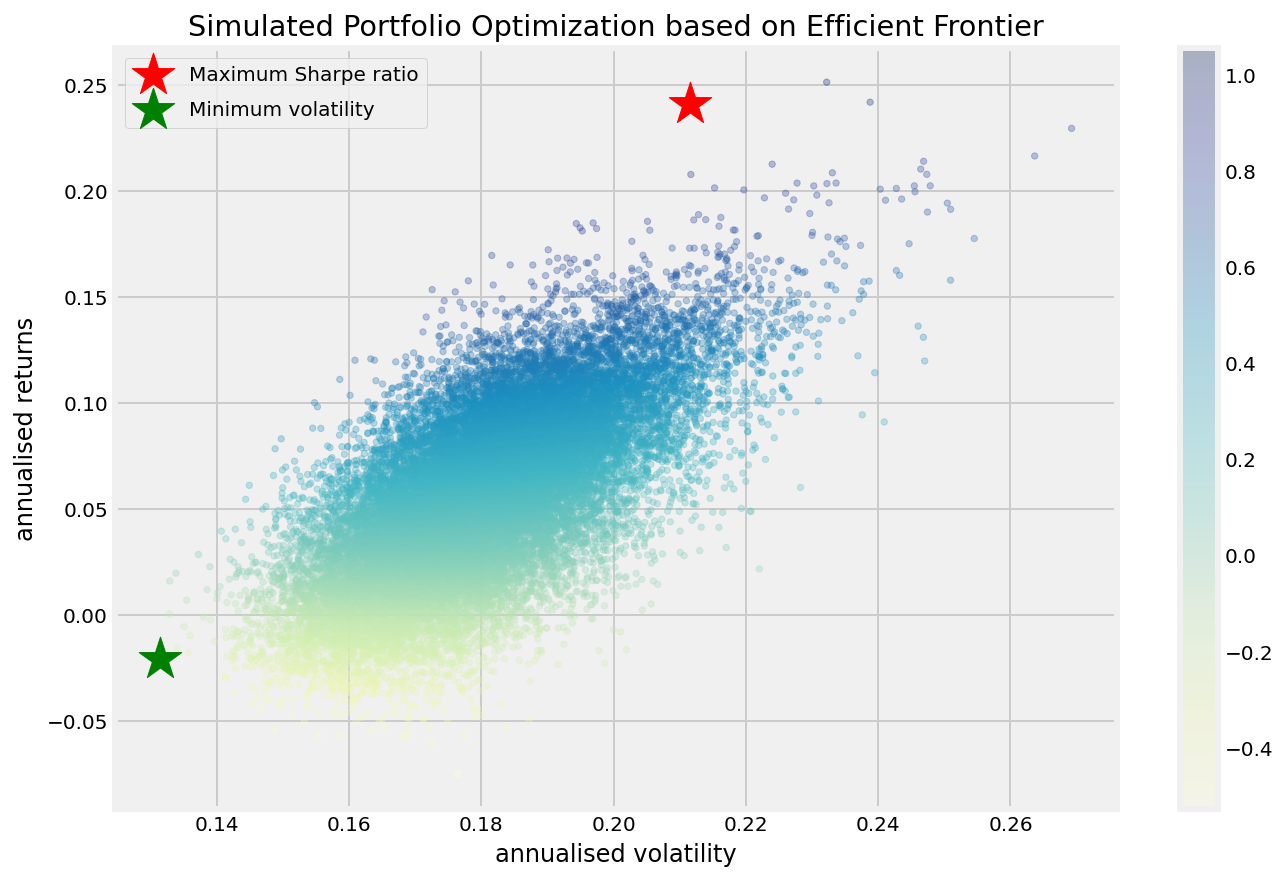

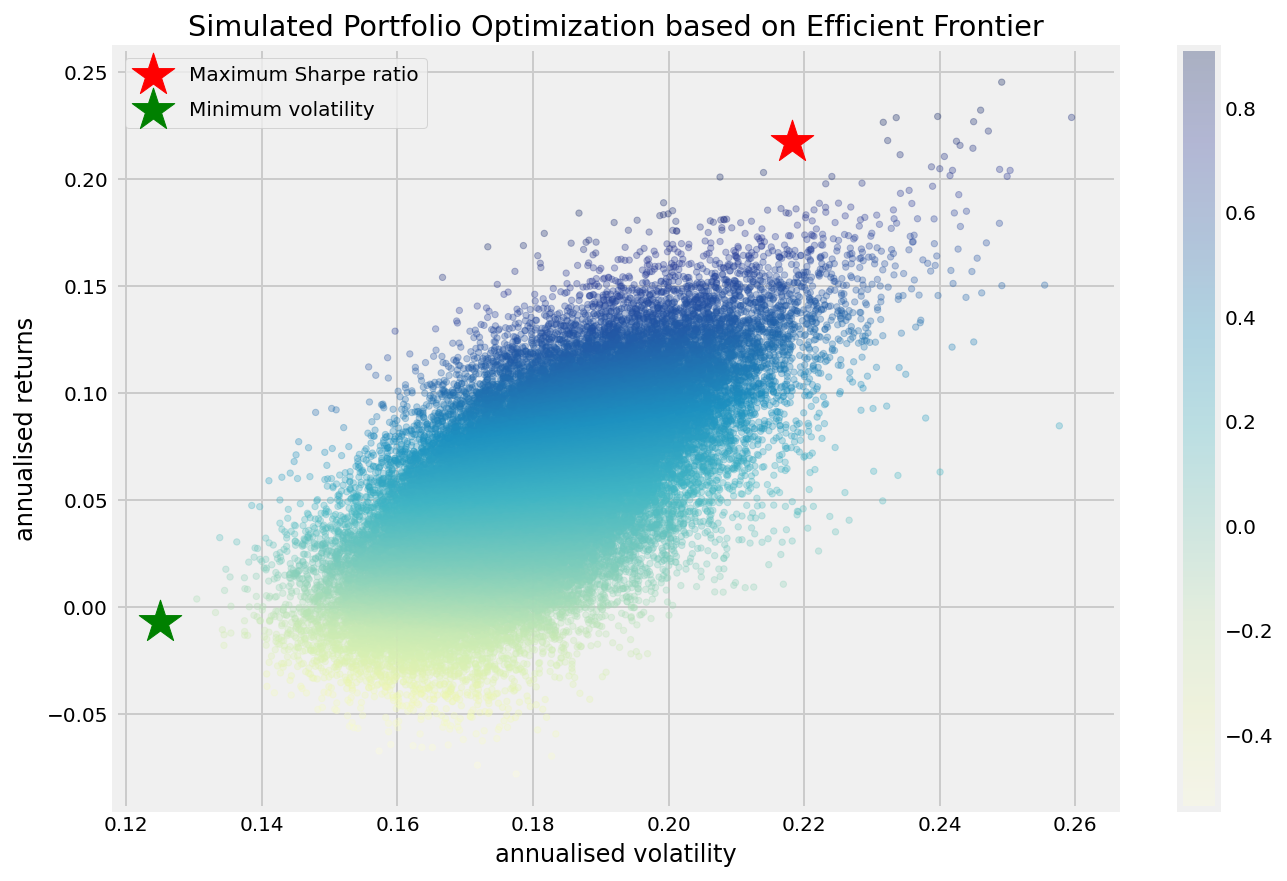

In [18]:
for i in num_portfolios:
    display_simulated_ef_with_random(mean_returns, cov_matrix, i, risk_free_rate)

In [19]:
def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    p_var, p_ret = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
    return -(p_ret - risk_free_rate) / p_var

In [33]:
def max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix, risk_free_rate)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(neg_sharpe_ratio, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)
    return result

In [20]:
def portfolio_volatility(weights, mean_returns, cov_matrix):
    return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[0]

In [34]:
def min_variance(mean_returns, cov_matrix):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))

    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)

    return result

In [21]:
def efficient_return(mean_returns, cov_matrix, target):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)

    def portfolio_return(weights):
        return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[1]

    constraints = ({'type': 'eq', 'fun': lambda x: portfolio_return(x) - target},
                   {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0,1) for asset in range(num_assets))
    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args, method='SLSQP', bounds=bounds, constraints=constraints)
    return result

In [35]:
def efficient_frontier(mean_returns, cov_matrix, returns_range):
    efficients = []
    for ret in returns_range:
        efficients.append(efficient_return(mean_returns, cov_matrix, ret))
    return efficients

In [22]:
def display_calculated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, _ = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe = max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate)
    sdp, rp = portfolio_annualised_performance(max_sharpe['x'], mean_returns, cov_matrix)
    max_sharpe_allocation = pd.DataFrame(max_sharpe.x,index=returns.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    max_sharpe_allocation

    min_vol = min_variance(mean_returns, cov_matrix)
    sdp_min, rp_min = portfolio_annualised_performance(min_vol['x'], mean_returns, cov_matrix)
    min_vol_allocation = pd.DataFrame(min_vol.x,index=returns.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    print ("-"*80)
    print ("Maximum Sharpe Ratio Portfolio Allocation\n")
    print ("Annualised Return:", round(rp,2))
    print ("Annualised Volatility:", round(sdp,2))
    print ("\n")
    print (max_sharpe_allocation)
    print ("-"*80)
    print ("Minimum Volatility Portfolio Allocation\n")
    print ("Annualised Return:", round(rp_min,2))
    print ("Annualised Volatility:", round(sdp_min,2))
    print ("\n")
    print (min_vol_allocation)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')

    target = np.linspace(rp_min, 0.32, 50)
    efficient_portfolios = efficient_frontier(mean_returns, cov_matrix, target)
    plt.plot([p['fun'] for p in efficient_portfolios], target, linestyle='-.', color='black', label='efficient frontier')
    plt.title('Calculated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('annualised volatility')
    plt.ylabel('annualised returns')
    plt.legend(labelspacing=0.8)
    return rp

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.6
Annualised Volatility: 0.38


            AAPL  AMZN  CSCO  GOOG  INTC  MSFT   NVDA  PYPL  TSLA    V
allocation   0.0   0.0   0.0   0.0   0.0   0.0  100.0   0.0   0.0  0.0
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.04
Annualised Volatility: 0.1


            AAPL  AMZN   CSCO  GOOG  INTC  MSFT  NVDA  PYPL  TSLA      V
allocation   0.0   0.0  37.98   0.0   0.0   0.0   0.0  2.13   0.0  59.89
--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.6
Annualised Volatility: 0.38


            AAPL  AMZN  CSCO  GOOG  INTC  MSFT   NVDA  PYPL  TSLA    V
allocation   0.0   0.0   0.0   0.0   0.0   0.0  100.0   0.0   0.0  0.0
-----------------------------------------

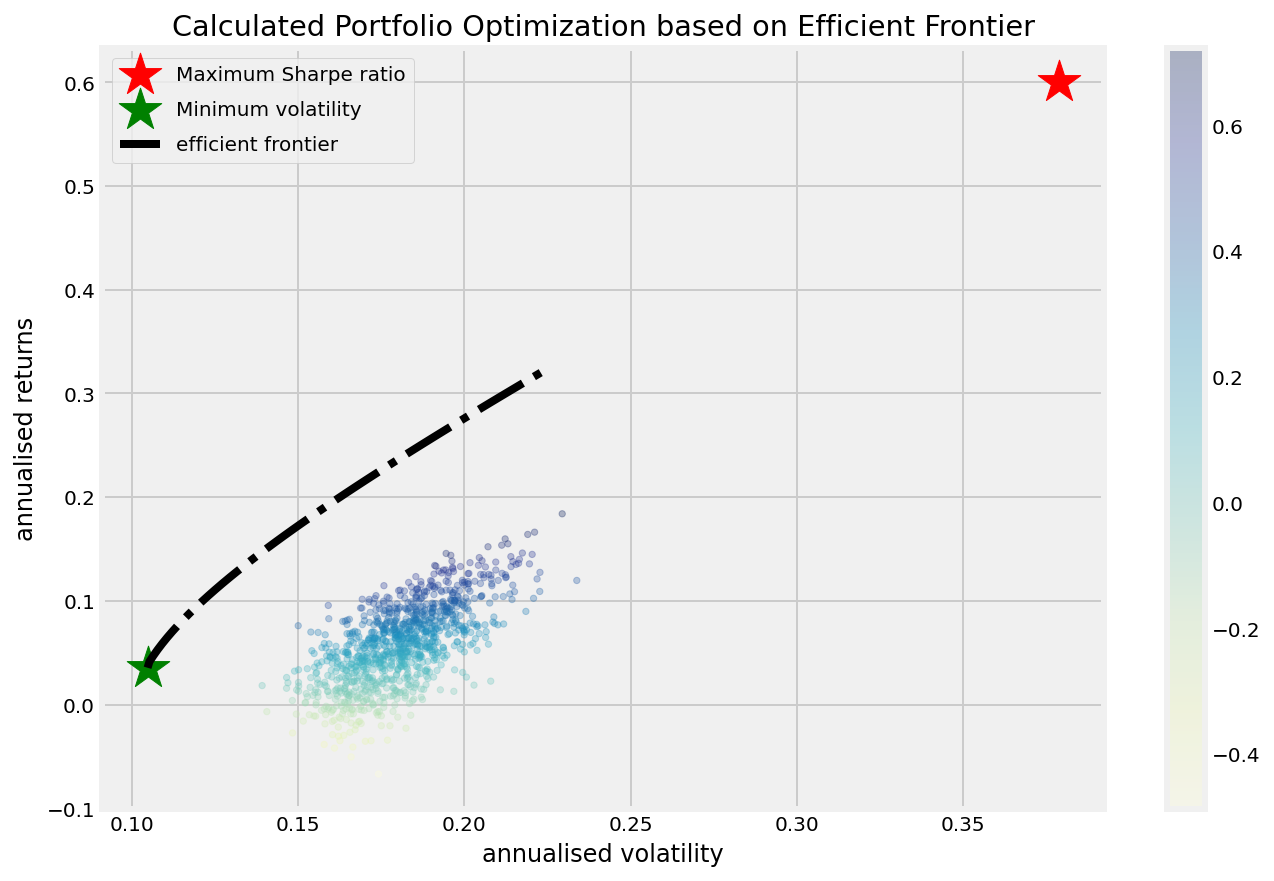

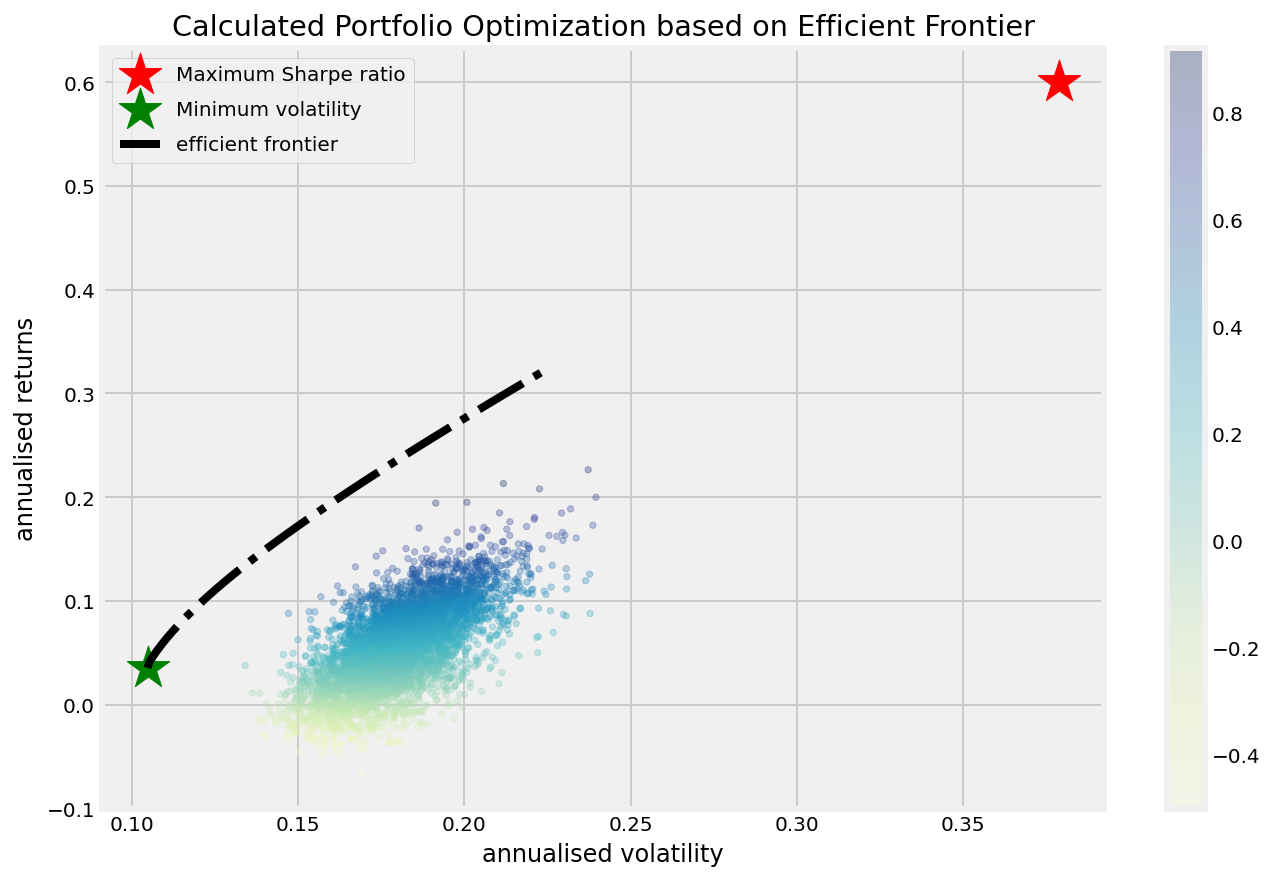

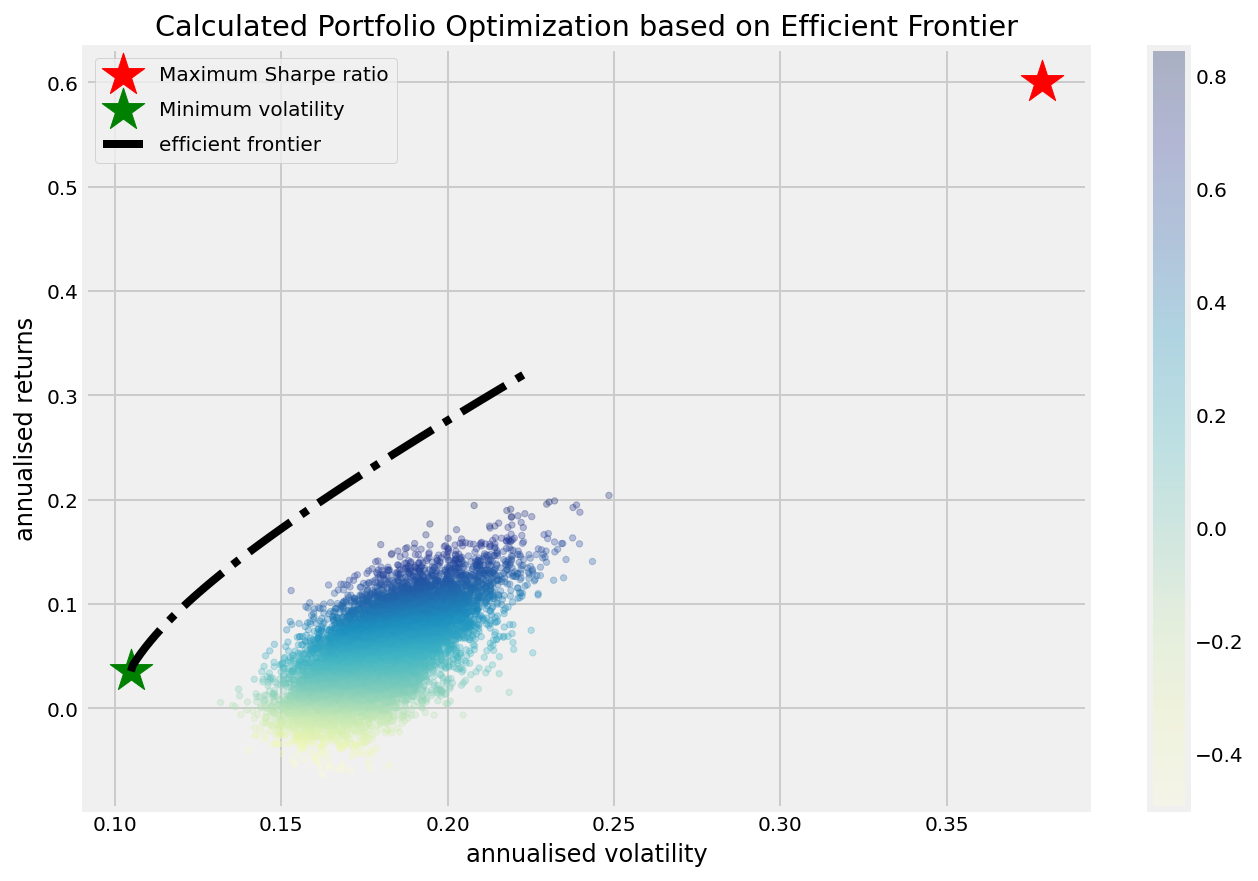

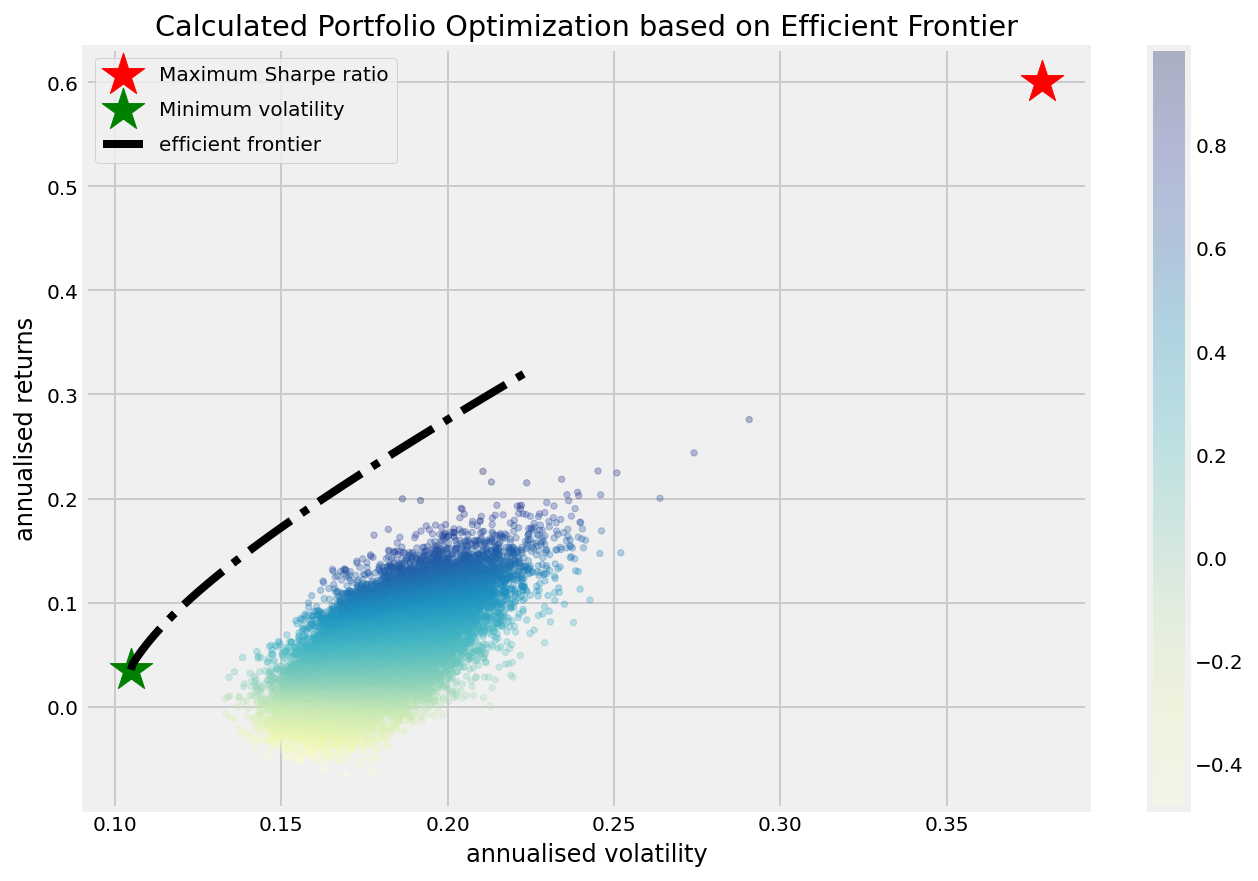

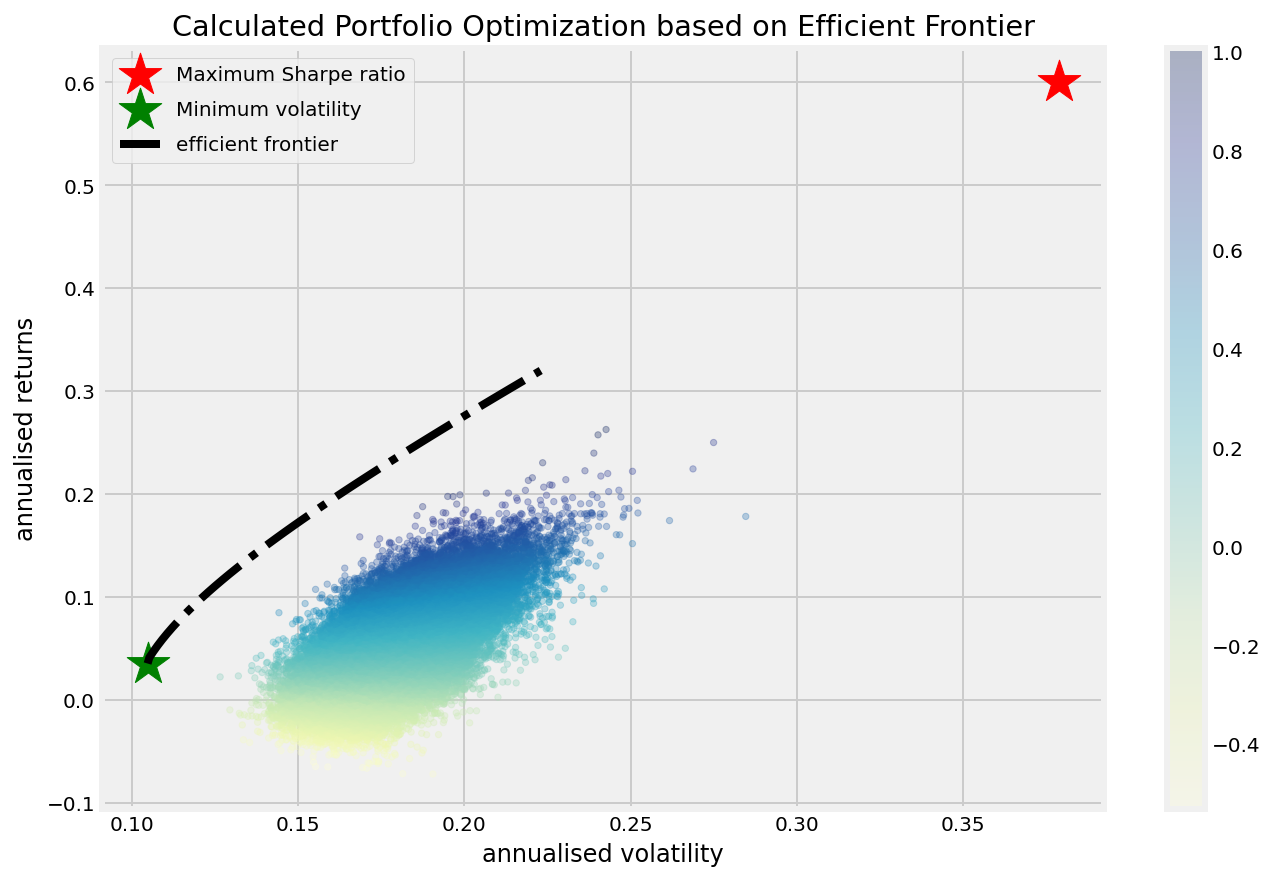

In [23]:
for i in num_portfolios:
    rp = display_calculated_ef_with_random(mean_returns, cov_matrix, i, risk_free_rate)

In [24]:
def display_ef_with_selected(mean_returns, cov_matrix, risk_free_rate):
    max_sharpe = max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate)
    sdp, rp = portfolio_annualised_performance(max_sharpe['x'], mean_returns, cov_matrix)
    max_sharpe_allocation = pd.DataFrame(max_sharpe.x,index=returns.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    max_sharpe_allocation

    min_vol = min_variance(mean_returns, cov_matrix)
    sdp_min, rp_min = portfolio_annualised_performance(min_vol['x'], mean_returns, cov_matrix)
    min_vol_allocation = pd.DataFrame(min_vol.x,index=returns.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    an_vol = np.std(returns) * np.sqrt(252)
    an_rt = mean_returns * 252
    
    print ("-"*80)
    print ("Maximum Sharpe Ratio Portfolio Allocation\n")
    print ("Annualised Return:", round(rp,2))
    print ("Annualised Volatility:", round(sdp,2))
    print ("\n")
    print (max_sharpe_allocation)
    print ("-"*80)
    print ("Minimum Volatility Portfolio Allocation\n")
    print ("Annualised Return:", round(rp_min,2))
    print ("Annualised Volatility:", round(sdp_min,2))
    print ("\n")
    print (min_vol_allocation)
    print ("-"*80)
    print ("Individual Stock Returns and Volatility\n")
    for i, txt in enumerate(returns.columns):
        print (txt,":","annuaised return",round(an_rt[i],2),", annualised volatility:",round(an_vol[i],2))
    print ("-"*80)
    
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.scatter(an_vol,an_rt,marker='o',s=200)

    for i, txt in enumerate(returns.columns):
        ax.annotate(txt, (an_vol[i],an_rt[i]), xytext=(10,0), textcoords='offset points')
    ax.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    ax.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')

    target = np.linspace(rp_min, 0.34, 50)
    efficient_portfolios = efficient_frontier(mean_returns, cov_matrix, target)
    ax.plot([p['fun'] for p in efficient_portfolios], target, linestyle='-.', color='black', label='efficient frontier')
    ax.set_title('Portfolio Optimization with Individual Stocks')
    ax.set_xlabel('annualised volatility')
    ax.set_ylabel('annualised returns')
    ax.legend(labelspacing=0.8)

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.6
Annualised Volatility: 0.38


            AAPL  AMZN  CSCO  GOOG  INTC  MSFT   NVDA  PYPL  TSLA    V
allocation   0.0   0.0   0.0   0.0   0.0   0.0  100.0   0.0   0.0  0.0
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.04
Annualised Volatility: 0.1


            AAPL  AMZN   CSCO  GOOG  INTC  MSFT  NVDA  PYPL  TSLA      V
allocation   0.0   0.0  37.98   0.0   0.0   0.0   0.0  2.13   0.0  59.89
--------------------------------------------------------------------------------
Individual Stock Returns and Volatility

AAPL : annuaised return 0.01 , annualised volatility: 0.3
AMZN : annuaised return 0.09 , annualised volatility: 0.41
CSCO : annuaised return 0.06 , annualised volatility: 0.22
GOOG : annuaised return -0.28 , annualised volatility: 0.4
INT

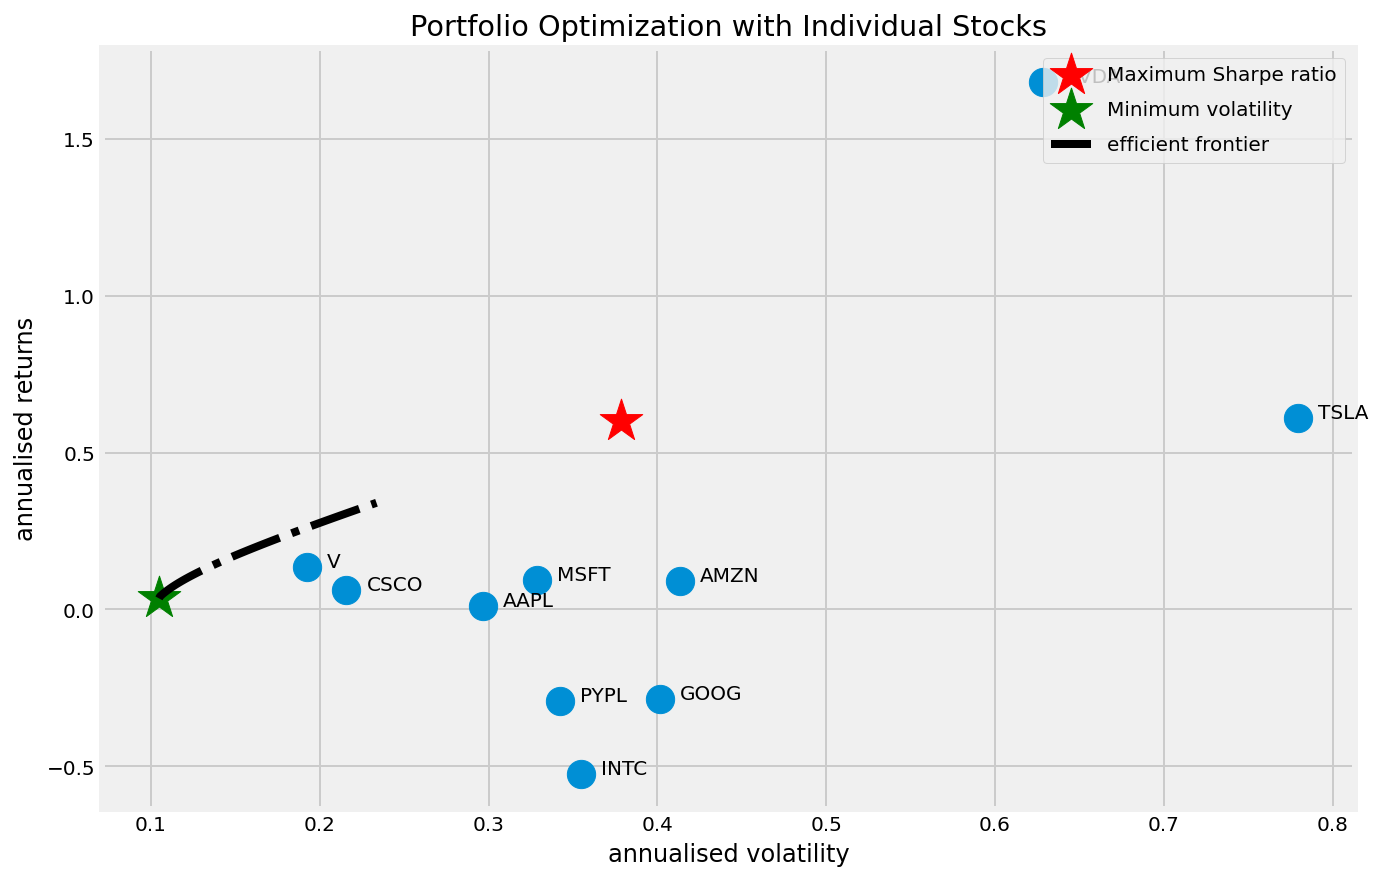

In [25]:
display_ef_with_selected(mean_returns, cov_matrix, risk_free_rate)

### Using a risk-free asset along with the 10 risky assets to obtain CAP"M". Drawing the straight line and showing that it is tangent to the efficient frontier and obtaining the market portfolio.

In [36]:
# Add a risk free rate of mean daily return of 0.5%.
risk_free_rate = 0.5 / 100
# Obtaining CAPM parameters.
def get_CAPM_parameters(mean_returns, risk_free_rate):
    CAPM_parameters = []
    for i in range(len(mean_returns)):
        CAPM_parameters.append((mean_returns[i] - risk_free_rate) / risk_free_rate)
    return CAPM_parameters

CAPM_parameters = get_CAPM_parameters(mean_returns, risk_free_rate)
print("CAPM_parameters: ", CAPM_parameters)

CAPM_parameters:  [-0.9911571769345926, -0.9289122092587063, -0.9501607851304626, -1.2256713437088427, -1.4160101020128426, -0.926407807380103, 0.333473605064755, -1.232303777204235, -0.515043586152508, -0.8918224553872408]


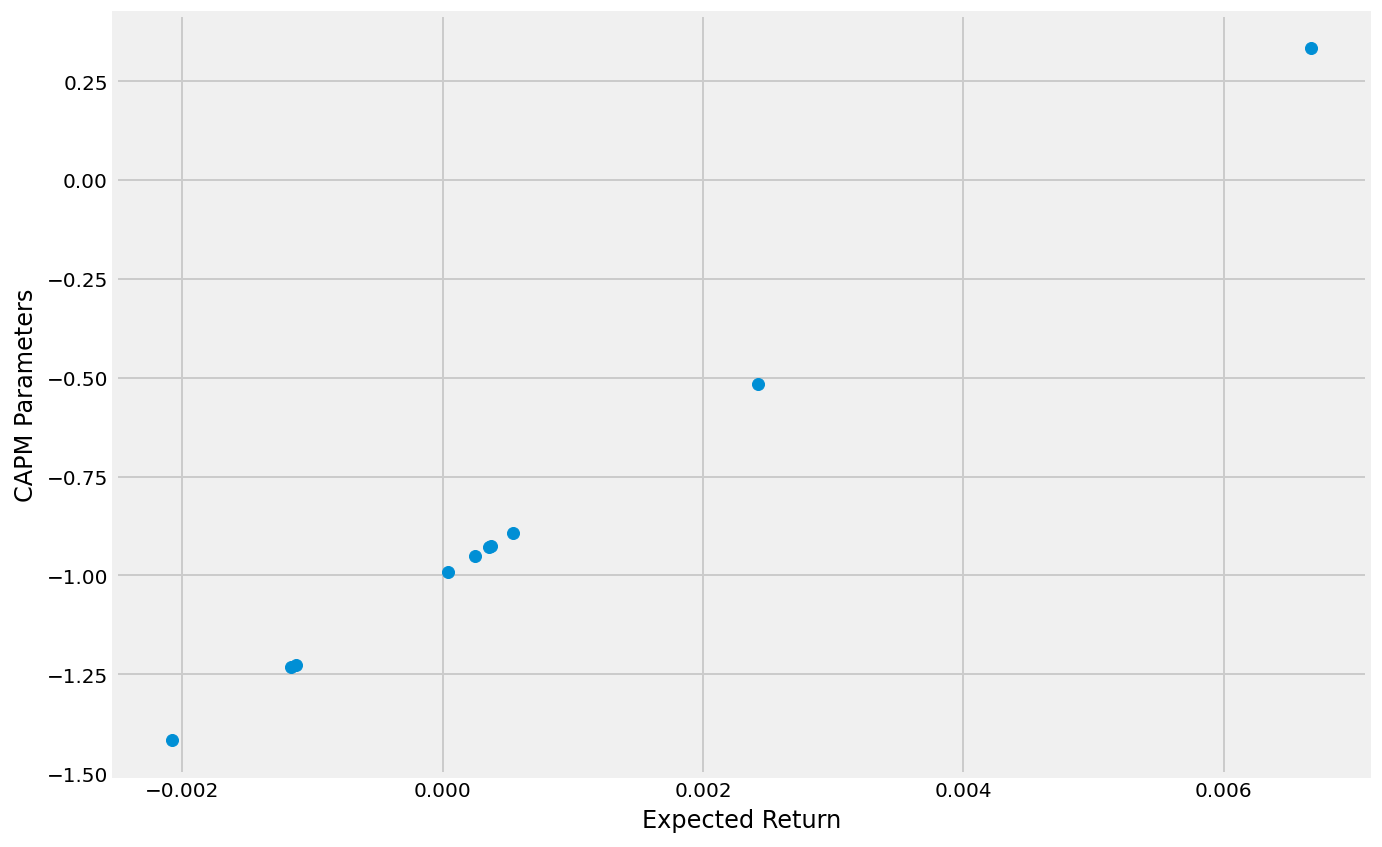

In [29]:
def plot_CAPM(mean_returns, risk_free_rate, CAPM_parameters):
    plt.figure(figsize = (10, 7))
    plt.scatter(mean_returns, CAPM_parameters, marker = 'o')
    plt.grid(True)
    plt.xlabel('Expected Return')
    plt.ylabel('CAPM Parameters')
    plt.show()

plot_CAPM(mean_returns, risk_free_rate, CAPM_parameters)

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.6
Annualised Volatility: 0.38


            AAPL  AMZN  CSCO  GOOG  INTC  MSFT   NVDA  PYPL  TSLA    V
allocation   0.0   0.0   0.0   0.0   0.0   0.0  100.0   0.0   0.0  0.0
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.04
Annualised Volatility: 0.1


            AAPL  AMZN   CSCO  GOOG  INTC  MSFT  NVDA  PYPL  TSLA      V
allocation   0.0   0.0  37.98   0.0   0.0   0.0   0.0  2.13   0.0  59.89
--------------------------------------------------------------------------------
Individual Stock Returns and Volatility

AAPL : annuaised return 0.01 , annualised volatility: 0.3
AMZN : annuaised return 0.09 , annualised volatility: 0.41
CSCO : annuaised return 0.06 , annualised volatility: 0.22
GOOG : annuaised return -0.28 , annualised volatility: 0.4
INT

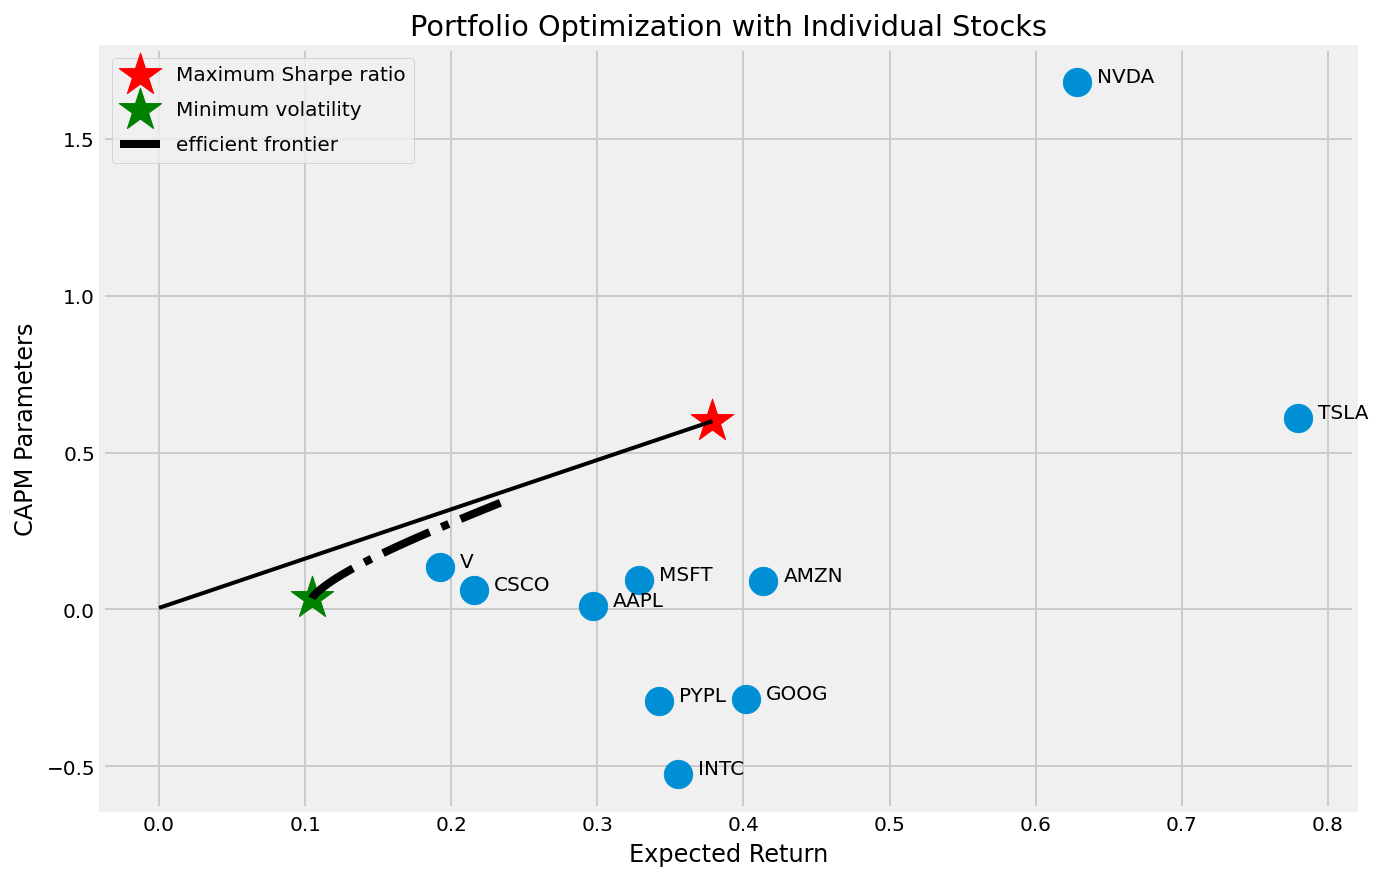

In [32]:
# Showing that it is a tangent line to the efficient frontier.
def plot_CAPM_with_EF(mean_returns, cov_matrix, risk_free_rate, CAPM_parameters):
    max_sharpe = max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate)
    sdp, rp = portfolio_annualised_performance(max_sharpe['x'], mean_returns, cov_matrix)
    max_sharpe_allocation = pd.DataFrame(max_sharpe.x,index=returns.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    max_sharpe_allocation

    min_vol = min_variance(mean_returns, cov_matrix)
    sdp_min, rp_min = portfolio_annualised_performance(min_vol['x'], mean_returns, cov_matrix)
    min_vol_allocation = pd.DataFrame(min_vol.x,index=returns.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    

    an_vol = np.std(returns) * np.sqrt(252)
    an_rt = mean_returns * 252
    
    print ("-"*80)
    print ("Maximum Sharpe Ratio Portfolio Allocation\n")
    print ("Annualised Return:", round(rp,2))
    print ("Annualised Volatility:", round(sdp,2))
    print ("\n")
    print (max_sharpe_allocation)
    print ("-"*80)
    print ("Minimum Volatility Portfolio Allocation\n")
    print ("Annualised Return:", round(rp_min,2))
    print ("Annualised Volatility:", round(sdp_min,2))
    print ("\n")
    print (min_vol_allocation)
    print ("-"*80)
    print ("Individual Stock Returns and Volatility\n")
    for i, txt in enumerate(returns.columns):
        print (txt,":","annuaised return",round(an_rt[i],2),", annualised volatility:",round(an_vol[i],2))
    print ("-"*80)
    
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.scatter(an_vol,an_rt,marker='o',s=200)

    for i, txt in enumerate(returns.columns):
        ax.annotate(txt, (an_vol[i],an_rt[i]), xytext=(10,0), textcoords='offset points')
    ax.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    ax.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')

    target = np.linspace(rp_min, 0.34, 50)
    efficient_portfolios = efficient_frontier(mean_returns, cov_matrix, target)
    ax.plot([p['fun'] for p in efficient_portfolios], target, linestyle='-.', color='black', label='efficient frontier')
    ax.set_title('Portfolio Optimization with Individual Stocks')
    ax.set_xlabel('annualised volatility')
    ax.set_ylabel('annualised returns')
    ax.legend(labelspacing=0.8)

    plt.plot([0, round(sdp,4)], [risk_free_rate, round(rp,4)], 'k-', linewidth=2, label='Tangent to the efficient frontier')
    plt.grid(True)
    plt.xlabel('Expected Return')
    plt.ylabel('CAPM Parameters')
    plt.show()

plot_CAPM_with_EF(mean_returns, cov_matrix, risk_free_rate, CAPM_parameters)

### Using any three assets out of the 10 risky assets to get three different Security Market Lines.

In [131]:
rf = 0.015
mrp = rp - rf

# Calculate the beta of each asset
asset1_beta = (mean_returns[0] - rf) / (rp - rf)
asset2_beta = (mean_returns[1] - rf) / (rp - rf)
asset3_beta = (mean_returns[2] - rf) / (rp - rf)

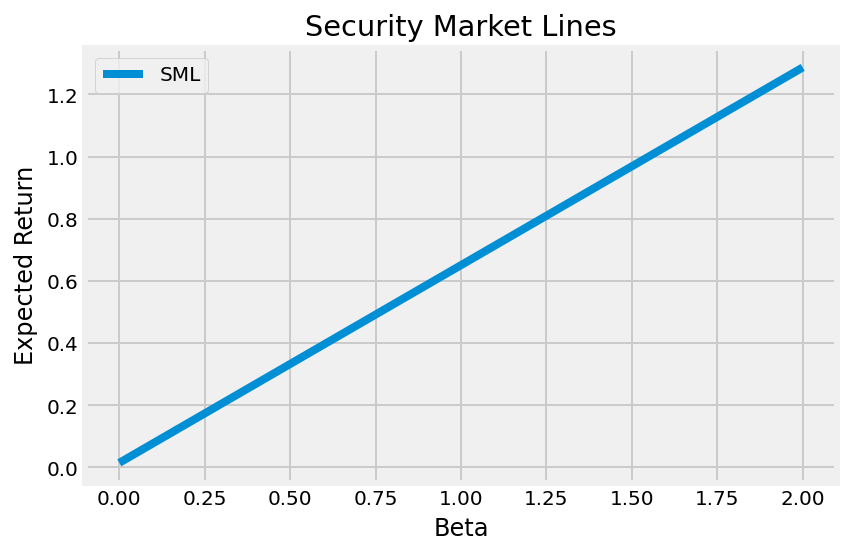

In [135]:
betas = np.linspace(0, 2, 100)

# Calculate the expected returns for each asset at different levels of beta
asset1_ers = rf + asset1_beta * (rp - rf) 
asset2_ers = rf + asset2_beta * (rp - rf) 
asset3_ers = rf + asset3_beta * (rp - rf) 

sml = rf + betas * (rp - rf) 

# Plot the Security Market Lines
plt.plot(betas, sml, label='SML')
plt.xlabel('Beta')
plt.ylabel('Expected Return')
plt.title('Security Market Lines')

# Add a legend to the plot
plt.legend()

# Display the plot
plt.show()

**END OF PROJECT**

---